# <center>Machine Learning with Tree-Based Models in Python</center>

[Data Camp Link](https://www.datacamp.com/courses/machine-learning-with-tree-based-models-in-python)

[Chapter 1: Classification and Regression Trees](#Chapter-1:-Classification-and-Regression-Trees) <br>
[Chapter 2: The Bias-Variance Tradeoff](#Chapter-2:-The-Bias-Variance-Tradeoff) <br>
[Chapter 3: Bagging and Random Forests](#Chapter-3:-Bagging-and-Random-Forests) <br>
[Chapter 4: Boosting](#Chapter-4:-Boosting) <br>
[Chapter 5: Model Tuning](#Chapter-5:-Model-Tuning)

In [1]:
# all necessary imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 1: Classification and Regression Trees

### Train your first classification tree

In this exercise you'll work with the [Wisconsin Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (`radius_mean`) and its mean number of concave points (`concave points_mean`).

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to `X_train` and `X_test`, while the arrays of labels are assigned to `y_train` and `y_test` where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called `SEED` which is set to 1.

#### Instructions

- Import `DecisionTreeClassifier` from `sklearn.tree`.
- Instantiate a `DecisionTreeClassifier` `dt` of maximum depth equal to 6.
- Fit `dt` to the training set.
- Predict the test set labels and assign the result to `y_pred`.

In [2]:
# first import the dataset
wbc = pd.read_csv('data/wbc.csv')
wbc['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)
wbc.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
wbc.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [3]:
# get the necessary columns for analysis
wbc_df = wbc[['diagnosis', 'radius_mean', 'concave points_mean']]

# convert diagnosis column to 1 and 0
wbc_df.head(2)

,diagnosis,radius_mean,concave points_mean
0,1,17.99,0.14710
1,1,20.57,0.07017


In [4]:
# split the data y is predicted while X is predictor
y = wbc_df['diagnosis']
X = wbc_df.drop('diagnosis', axis=1)

In [5]:
from sklearn.model_selection import train_test_split

# assign random state
SEED=1

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=SEED)

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set.

----

### Evaluate the classification tree

Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model `dt` from the previous exercise is loaded in your workspace along with the test set features matrix `X_test` and the array of labels `y_test`.

#### Instructions

- Import the function `accuracy_score` from `sklearn.metrics`.
- Predict the test set labels and assign the obtained array to `y_pred`.
- Evaluate the test set accuracy score of `dt` by calling `accuracy_score()` and assign the value to `acc`.

In [6]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_pred, y_test)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


Using only two features, your tree was able to achieve an accuracy of 89%!

----

### Logistic regression vs classification tree

A classification tree divides the feature space into **rectangular regions**. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called `plot_labeled_decision_regions()` that you can use to plot the decision regions of a list containing two trained classifiers. You can type `help(plot_labeled_decision_regions)` in the IPython shell to learn more about this function.

`X_train`, `X_test`, `y_train`, `y_test`, the model `dt` that you've trained in an earlier [exercise](https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/classification-and-regression-trees?ex=2) , as well as the function `plot_labeled_decision_regions()` are available in your workspace.

#### Instructions

- Import `LogisticRegression` from `sklearn.linear_model`.
- Instantiate a `LogisticRegression` model and assign it to `logreg`.
- Fit `logreg` to the training set.
- Review the plot generated by `plot_labeled_decision_regions()`.

In [7]:
# function in the question
def plot_labeled_decision_regions(X,y, models):    
    '''
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(8.0,8.0), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

In [8]:
from sklearn.utils import check_X_y
from itertools import cycle

def plot_decision_regions(X, y, clf,
                          feature_index=None,
                          filler_feature_values=None,
                          filler_feature_ranges=None,
                          ax=None,
                          X_highlight=None,
                          res=0.02, legend=1,
                          hide_spines=True,
                          markers='s^oxv<>',
                          colors='red,blue,limegreen,gray,cyan'):
    """Plot decision regions of a classifier.

    Please note that this functions assumes that class labels are
    labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
    labels with integer labels > 4, you may want to provide additional colors
    and/or markers as `colors` and `markers` arguments.
    See http://matplotlib.org/examples/color/named_colors.html for more
    information.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Feature Matrix.
    y : array-like, shape = [n_samples]
        True class labels.
    clf : Classifier object.
        Must have a .predict method.
    feature_index : array-like (default: (0,) for 1D, (0, 1) otherwise)
        Feature indices to use for plotting. The first index in
        `feature_index` will be on the x-axis, the second index will be
        on the y-axis.
    filler_feature_values : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted.
    filler_feature_ranges : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted. Will use the
        ranges provided to select training samples for plotting.
    ax : matplotlib.axes.Axes (default: None)
        An existing matplotlib Axes. Creates
        one if ax=None.
    X_highlight : array-like, shape = [n_samples, n_features] (default: None)
        An array with data points that are used to highlight samples in `X`.
    res : float or array-like, shape = (2,) (default: 0.02)
        Grid width. If float, same resolution is used for both the x- and
        y-axis. If array-like, the first item is used on the x-axis, the
        second is used on the y-axis. Lower values increase the resolution but
        slow down the plotting.
    hide_spines : bool (default: True)
        Hide axis spines if True.
    legend : int (default: 1)
        Integer to specify the legend location.
        No legend if legend is 0.
    markers : str (default 's^oxv<>')
        Scatterplot markers.
    colors : str (default 'red,blue,limegreen,gray,cyan')
        Comma separated list of colors.

    Returns
    ---------
    ax : matplotlib.axes.Axes object

    """

    check_X_y(X, y, y_numeric=True)  # Validate X and y arrays
    dim = X.shape[1]

    if ax is None:
        ax = plt.gca()

    if isinstance(res, float):
        xres, yres = res, res
    else:
        try:
            xres, yres = res
        except ValueError:
            raise ValueError('Unable to unpack res. Expecting '
                             'array-like input of length 2.')

    plot_testdata = True
    if not isinstance(X_highlight, np.ndarray):
        if X_highlight is not None:
            raise ValueError('X_highlight must be a NumPy array or None')
        else:
            plot_testdata = False
    elif len(X_highlight.shape) < 2:
        raise ValueError('X_highlight must be a 2D array')

    if feature_index is not None:
        # Unpack and validate the feature_index values
        if dim == 1:
            raise ValueError(
                'feature_index requires more than one training feature')
        try:
            x_index, y_index = feature_index
        except ValueError:
            raise ValueError(
                'Unable to unpack feature_index. Make sure feature_index '
                'only has two dimensions.')
        try:
            X[:, x_index], X[:, y_index]
        except IndexError:
            raise IndexError(
                'feature_index values out of range. X.shape is {}, but '
                'feature_index is {}'.format(X.shape, feature_index))
    else:
        feature_index = (0, 1)
        x_index, y_index = feature_index

    # Extra input validation for higher number of training features
    if dim > 2:
        if filler_feature_values is None:
            raise ValueError('Filler values must be provided when '
                             'X has more than 2 training features.')

        if filler_feature_ranges is not None:
            if not set(filler_feature_values) == set(filler_feature_ranges):
                raise ValueError(
                    'filler_feature_values and filler_feature_ranges must '
                    'have the same keys')

        # Check that all columns in X are accounted for
        column_check = np.zeros(dim, dtype=bool)
        for idx in filler_feature_values:
            column_check[idx] = True
        for idx in feature_index:
            column_check[idx] = True
        if not all(column_check):
            missing_cols = np.argwhere(~column_check).flatten()
            raise ValueError(
                'Column(s) {} need to be accounted for in either '
                'feature_index or filler_feature_values'.format(missing_cols))

    marker_gen = cycle(list(markers))

    n_classes = np.unique(y).shape[0]
    colors = colors.split(',')
    colors_gen = cycle(colors)
    colors = [next(colors_gen) for c in range(n_classes)]

    # Get minimum and maximum
    x_min, x_max = X[:, x_index].min() - 1, X[:, x_index].max() + 1
    if dim == 1:
        y_min, y_max = -1, 1
    else:
        y_min, y_max = X[:, y_index].min() - 1, X[:, y_index].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, xres),
                         np.arange(y_min, y_max, yres))

    if dim == 1:
        X_predict = np.array([xx.ravel()]).T
    else:
        X_grid = np.array([xx.ravel(), yy.ravel()]).T
        X_predict = np.zeros((X_grid.shape[0], dim))
        X_predict[:, x_index] = X_grid[:, 0]
        X_predict[:, y_index] = X_grid[:, 1]
        if dim > 2:
            for feature_idx in filler_feature_values:
                X_predict[:, feature_idx] = filler_feature_values[feature_idx]
    Z = clf.predict(X_predict)
    Z = Z.reshape(xx.shape)
    # Plot decisoin region
    ax.contourf(xx, yy, Z,
                alpha=0.3,
                colors=colors,
                levels=np.arange(Z.max() + 2) - 0.5)

    ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())

    # Scatter training data samples
    for idx, c in enumerate(np.unique(y)):
        if dim == 1:
            y_data = [0 for i in X[y == c]]
            x_data = X[y == c]
        elif dim == 2:
            y_data = X[y == c, y_index]
            x_data = X[y == c, x_index]
        elif dim > 2 and filler_feature_ranges is not None:
            class_mask = y == c
            feature_range_mask = get_feature_range_mask(
                            X, filler_feature_values=filler_feature_values,
                            filler_feature_ranges=filler_feature_ranges)
            y_data = X[class_mask & feature_range_mask, y_index]
            x_data = X[class_mask & feature_range_mask, x_index]
        else:
            continue

        ax.scatter(x=x_data,
                   y=y_data,
                   alpha=0.8,
                   c=colors[idx],
                   marker=next(marker_gen),
                   edgecolor='black',
                   label=c)

    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if dim == 1:
        ax.axes.get_yaxis().set_ticks([])

    if legend:
        if dim > 2 and filler_feature_ranges is None:
            pass
        else:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels,
                      framealpha=0.3, scatterpoints=1, loc=legend)

    if plot_testdata:
        if dim == 1:
            x_data = X_highlight
            y_data = [0 for i in X_highlight]
        elif dim == 2:
            x_data = X_highlight[:, x_index]
            y_data = X_highlight[:, y_index]
        else:
            feature_range_mask = get_feature_range_mask(
                    X_highlight, filler_feature_values=filler_feature_values,
                    filler_feature_ranges=filler_feature_ranges)
            y_data = X_highlight[feature_range_mask, y_index]
            x_data = X_highlight[feature_range_mask, x_index]

        ax.scatter(x_data,
                   y_data,
                   c='',
                   edgecolor='black',
                   alpha=1.0,
                   linewidths=1,
                   marker='o',
                   s=80)

    return ax

/Users/icer/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


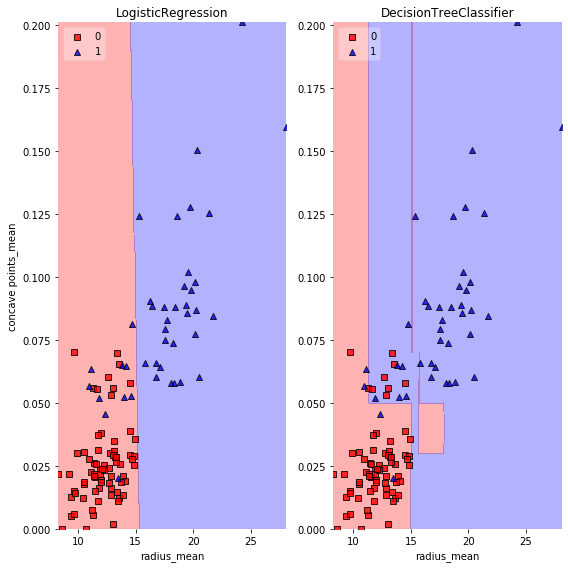

In [9]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

----

### Growing a classification tree

In the video, you saw that the growth of an unconstrained classification tree followed a few simple rules. Which of the following is **not** one of these rules?

#### Possible Answers

- The existence of a node depends on the state of its predecessors.
- The impurity of a node can be determined using different criteria such as entropy and the gini-index.
- When the information gain resulting from splitting a node is null, the node is declared as a leaf.
- **When an internal node is split, the split is performed in such a way so that information gain is minimized**.

It's quite the contrary! Actually, splitting an internal node always involves maximizing information gain!

----

### Using entropy as a criterion

In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

`X_train` as well as the array of labels `y_train` are available in your workspace.

#### Instructions

- Import `DecisionTreeClassifier` from `sklearn.tree`.
- Instantiate a `DecisionTreeClassifier` `dt_entropy` with a maximum depth of 8.
- Set the information criterion to `'entropy'`.
- Fit `dt_entropy` on the training set.

In [10]:
# this time we will be using 30 features
X = wbc.drop('diagnosis', axis=1)
y = wbc['diagnosis']

In [11]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=SEED)

In [12]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In the next exercise, you'll compare the accuracy of `dt_entropy` to the accuracy of a another tree trained using the gini-index as the information criterion.

----

### Entropy vs Gini index

In this exercise you'll compare the test set accuracy of `dt_entropy` to the accuracy of another tree named `dt_gini`. The tree `dt_gini` was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword `'gini'`.

`X_test`, `y_test`, `dt_entropy`, as well as `accuracy_gini` which corresponds to the test set accuracy achieved by `dt_gini` are available in your workspace.

#### Instructions

- Import `accuracy_score` from `sklearn.metrics`.
- Predict the test set labels of `dt_entropy` and assign the result to `y_pred`.
- Evaluate the test set accuracy of `dt_entropy` and assign the result to `accuracy_entropy`.
- Review `accuracy_entropy` and `accuracy_gini`.

In [13]:
# prepare accuracy gini model
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# predict y_pred
y_pred = dt_gini.predict(X_test)

# get the accuracy score
accuracy_gini = accuracy_score(y_test, y_pred)
print(accuracy_gini)

0.9298245614035088


In [14]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9298245614035088
Accuracy achieved by using the gini index:  0.9298245614035088


**Notice** how the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the `DecisionTreeClassifier` model of scikit-learn.

----

### Train your first regression tree

In this exercise, you'll train a regression tree to predict the `mpg` (miles per gallon) consumption of cars in the [auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset) using all the six available features.

The dataset is processed for you and is split to 80% train and 20% test. The features matrix `X_train` and the array `y_train` are available in your workspace.

#### Instructions

- Import `DecisionTreeRegressor` from `sklearn.tree`.
- Instantiate a `DecisionTreeRegressor` `dt` with maximum depth 8 and `min_samples_leaf` set to 0.13.
- Fit `dt` to the training set.

In [15]:
# import the dataset
auto_df = pd.read_csv('data/auto.csv')

# convert origin column to dummies
auto_df = pd.get_dummies(auto_df)

# see the dataframe
auto_df.head(2)

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1


In [16]:
# define X and y
X = auto_df.drop('mpg', axis=1)
y = auto_df['mpg']

# split data into train test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=3)

In [17]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.13,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

In the next exercise, you'll evaluate `dt`'s performance on the test set.

----

### Evaluate the regression tree

In this exercise, you will evaluate the test set performance of `dt` using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

The features matrix `X_test`, the array `y_test`, as well as the decision tree regressor `dt` that you trained in the previous exercise are available in your workspace.

#### Instructions

- Import the function `mean_squared_error` as `MSE` from `sklearn.metrics`.
- Predict the test set labels and assign the output to `y_pred`.
- Compute the test set MSE by calling `MSE` and assign the result to `mse_dt`.
- Compute the test set RMSE and assign it to `rmse_dt`.

In [18]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


In the next exercise, you'll compare the test-set RMSE of `dt` to that of a linear regression model trained on the same dataset.

----

### Linear regression vs regression tree

In this exercise, you'll compare the test set RMSE of `dt` to that achieved by a linear regression model. We have already instantiated a linear regression model `lr` and trained it on the same dataset as `dt`.

The features matrix `X_test`, the array of labels `y_test`, the trained linear regression model `lr`, `mean_squared_error` function which was imported under the alias `MSE` and `rmse_dt` from the previous exercise are available in your workspace.

#### Instructions

- Predict test set labels using the linear regression model (`lr`) and assign the result to `y_pred_lr`.
- Compute the test set MSE and assign the result to `mse_lr`.
- Compute the test set RMSE and assign the result to `rmse_lr`.

In [19]:
# import Linear Regression
from sklearn.linear_model import LinearRegression

# instantiate a Linear Regression Model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37


Lower values of **RMSE** indicate better fit. **RMSE** is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

----

# Chapter 2: The Bias-Variance Tradeoff

### Complexity, bias and variance

In the video, you saw how the complexity of a model labeled $f̂$ influences the bias and variance terms of its generalization error.

Which of the following correctly describes the relationship between $f̂$ 's complexity and $f̂$ 's bias and variance terms?

#### Possible Answers

- As the complexity of $f̂$ decreases, the bias term decreases while the variance term increases.
- As the complexity of $f̂$ decreases, both the bias and the variance terms increase.
- As the complexity of $f̂$ increases, the bias term increases while the variance term decreases.
- **As the complexity of $f̂$ increases, the bias term decreases while the variance term increases**.

![Bias Variance Trade-off](img/model_complexity.png)

----

### Overfitting and underfitting

In this exercise, you'll visually diagnose whether a model is overfitting or underfitting the training set.

For this purpose, we have trained two different models $A$ and $B$ on the auto dataset to predict the `mpg` consumption of a car using only the car's displacement (`displ`) as a feature.

The following figure shows you scatterplots of `mpg` versus `displ` along with lines corresponding to the training set predictions of models $A$ and $B$ in red.

![Diagnose Problems](img/diagnose_problems.jpg)

Which of the following statements is true?

#### Possible Answers

- $A$ suffers from high bias and overfits the training set.
- $A$ suffers from high variance and underfits the training set.
- **$B$ suffers from high bias and underfits the training set**.
- $B$ suffers from high variance and underfits the training set.

Model B is not able to capture the nonlinear dependence of `mpg` on `displ`.

----

### Instantiate the model

In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

We have already processed the data and loaded the features matrix `X` and the array `y` in your workspace. In addition, the `DecisionTreeRegressor` class was imported from `sklearn.tree`.

#### Instructions

- Import `train_test_split` from `sklearn.model_selection`.
- Split the data into 70% train and 30% test.
- Instantiate a `DecisionTreeRegressor` with max depth 4 and `min_samples_leaf` set to 0.26.

In [21]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

In the next exercise, you'll evaluate `dt`'s CV error.

----

### Evaluate the 10-fold CV error

In this exercise, you'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree `dt` that you instantiated in the previous exercise.

In addition to `dt`, the training data including `X_train` and `y_train` are available in your workspace. We also imported `cross_val_score` from `sklearn.model_selection`.

Note that since `cross_val_score` has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs.

#### Instructions

- Compute `dt`'s 10-fold cross-validated MSE by setting the `scoring` argument to `'neg_mean_squared_error'`.
- Compute RMSE from the obtained MSE scores.

In [22]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

----

### Evaluate the training error

You'll now evaluate the training set RMSE achieved by the regression tree `dt` that you instantiated in a previous exercise.

In addition to `dt`, `X_train` and `y_train` are available in your workspace.

#### Instructions

- Import `mean_squared_error` as `MSE` from `sklearn.metrics`.
- Fit `dt` to the training set.
- Predict `dt`'s training set labels and assign the result to `y_pred_train`.
- Evaluate `dt`'s training set MSE and assign it to `RMSE_train`.

In [23]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


Notice how the training error is roughly equal to the 10-folds CV error you obtained in the previous exercice.

----

### High bias or high variance?

In this exercise you'll diagnose whether the regression tree `dt` you trained in the previous exercise suffers from a bias or a variance problem.

The training set RMSE (`RMSE_train`) and the CV RMSE (`RMSE_CV`) achieved by `dt` are available in your workspace. In addition, we have also loaded a variable called `baseline_RMSE` which corresponds to the root mean-squared error achieved by the regression-tree trained with the `disp` feature only (it is the RMSE achieved by the regression tree trained in chapter 1, lesson 3). Here `baseline_RMSE` serves as the baseline RMSE above which a model is considered to be underfitting and below which the model is considered 'good enough'.

Does `dt` suffer from a high bias or a high variance problem?

#### Possible Answers

- `dt` suffers from high variance because `RMSE_CV` is far less than `RMSE_train`.
- **`dt` suffers from high bias because `RMSE_CV` ≈ `RMSE_train` and both scores are greater than `baseline_RMSE`**.
- `dt` is a good fit because `RMSE_CV` ≈ `RMSE_train` and both scores are smaller than `baseline_RMSE`.

baseline_RMSE = 5.1 <br>
RMSE_CV = 5.14 <br>
RMSE_train = 5.15

`dt` is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels.

----

### Define the ensemble

In the following set of exercises, you'll work with the [Indian Liver Patient Dataset](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset) from the UCI Machine learning repository.

In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

The classes `LogisticRegression`, `DecisionTreeClassifier`, and `KNeighborsClassifier` under the alias `KNN` are available in your workspace.

#### Instructions

- Instantiate a Logistic Regression classifier and assign it to `lr`.
- Instantiate a KNN classifier that considers 27 nearest neighbors and assign it to `knn`.
- Instantiate a Decision Tree Classifier with the parameter `min_samples_leaf` set to 0.13 and assign it to `dt`.

In [24]:
from sklearn.neighbors import KNeighborsClassifier as KNN
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED, solver='liblinear', n_jobs=1, multi_class='ovr')

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In the next exercise, you will train these classifiers and evaluate their test set accuracy.

----

### Evaluate individual classifiers

In this exercise you'll evaluate the performance of the models in the list `classifiers` that we defined in the previous exercise. You'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

The dataset is already loaded and preprocessed for you (numerical features are standardized) and it is split into 70% train and 30% test. The features matrices `X_train` and `X_test`, as well as the arrays of labels `y_train` and `y_test` are available in your workspace. In addition, we have loaded the list `classifiers` from the previous exercise, as well as the function `accuracy_score()` from `sklearn.metrics`.

#### Instructions

- Iterate over the tuples in classifiers. Use `clf_name` and `clf` as the `for` loop variables:
    - Fit `clf` to the training set.
    - Predict `clf`'s test set labels and assign the results to `y_pred`.
    - Evaluate the test set accuracy of `clf` and print the result.

In [25]:
# import the dataset
liver = pd.read_csv('data/indian_liver_patient/indian_liver_patient_preprocessed.csv')
liver.head(2)
liver.columns

Index(['Unnamed: 0', 'Age_std', 'Total_Bilirubin_std', 'Direct_Bilirubin_std',
       'Alkaline_Phosphotase_std', 'Alamine_Aminotransferase_std',
       'Aspartate_Aminotransferase_std', 'Total_Protiens_std', 'Albumin_std',
       'Albumin_and_Globulin_Ratio_std', 'Is_male_std', 'Liver_disease'],
      dtype='object')

In [26]:
# prepare X and y
X = liver.drop('Liver_disease', axis=1)
y = liver['Liver_disease']

In [27]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=SEED)

In [28]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.667
K Nearest Neighbours : 0.713
Classification Tree : 0.678


**NOTE**: Although **Logistic Regression** performed better on DataCamp IPython shell, **K Nearest Neighbors** performed better in our model. There might be different issues related to change in `LogisticRegression()` options.

----

### Better performance with a Voting Classifier

Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list `classifiers` and assigns labels by majority voting.

`X_train`, `X_test`, `y_train`, `y_test`, the list `classifiers` defined in a previous exercise, as well as the function `accuracy_score` from `sklearn.metrics` are available in your workspace.

#### Instructions

- Import `VotingClassifier` from `sklearn.ensemble`.
- Instantiate a `VotingClassifier` by setting the parameter `estimators` to `classifiers` and assign it to `vc`.
- Fit `vc` to the training set.
- Evaluate `vc`'s test set accuracy using the test set predictions `y_pred`.

In [29]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.695


----

# Chapter 3: Bagging and Random Forests

### Define the bagging classifier

In the following exercises you'll work with the [Indian Liver Patient](https://www.kaggle.com/uciml/indian-liver-patient-records) dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

#### Instructions

- Import `DecisionTreeClassifier` from `sklearn.tree` and `BaggingClassifier` from `sklearn.ensemble`.
- Instantiate a `DecisionTreeClassifier` called `dt`.
- Instantiate a `BaggingClassifier` called `bc` consisting of 50 trees.

In [30]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In the following exercise, you'll train bc and evaluate its test set performance.

----

### Evaluate Bagging performance

Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices `X_train` and `X_test`, as well as the arrays of labels `y_train` and `y_test` are available in your workspace. In addition, we have also loaded the bagging classifier `bc` that you instantiated in the previous exercise and the function `accuracy_score()` from `sklearn.metrics`.

#### Instructions

- Fit `bc` to the training set.
- Predict the test set labels and assign the result to `y_pred`.
- Determine `bc`'s test set accuracy.

In [31]:
# prepare X and y for train dataset
X = liver.drop(['Liver_disease', 'Unnamed: 0'], axis=1)
y = liver['Liver_disease']

In [32]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=SEED)

In [33]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.68


A single tree dt would have achieved an accuracy of 63% which is 5% lower than bc's accuracy! <br>
**NOTE** that DataCamp's sample has more data than provided in the files.

----

### Prepare the ground

In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter `oob_score` to `True` during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the `.oob_score_` attribute from the corresponding instance.

In your environment, we have made available the class `DecisionTreeClassifier` from `sklearn.tree`.

#### Instructions

- Import `BaggingClassifier` from `sklearn.ensemble`.
- Instantiate a `DecisionTreeClassifier` with `min_samples_leaf` set to 8.
- Instantiate a `BaggingClassifier` consisting of 50 trees and set `oob_score` to `True`.

In [34]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

In the following exercise, you'll train `bc` and compare its test set accuracy to its OOB accuracy.

----

### OOB Score vs Test Set Score

Now that you instantiated `bc`, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices `X_train` and `X_test`, as well as the arrays of labels `y_train` and `y_test` are available in your workspace. In addition, we have also loaded the classifier `bc` instantiated in the previous exercise and the function `accuracy_score()` from `sklearn.metrics`.

#### Instructions

- Fit `bc` to the training set and predict the test set labels and assign the results to `y_pred`.
- Evaluate the test set accuracy `acc_test` by calling `accuracy_score`.
- Evaluate `bc`'s OOB accuracy `acc_oob` by extracting the attribute `oob_score_` from `bc`.

In [35]:
# prepare X and y for train dataset
X = liver.drop(['Liver_disease', 'Unnamed: 0'], axis=1)
y = liver['Liver_disease']

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=SEED)

In [36]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.698, OOB accuracy: 0.700


The test set accuracy and the OOB accuracy of `bc` are both roughly equal to 70%!

----

### Train an RF regressor

In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix `X_train` and the array `y_train` are available in your workspace.

#### Instructions

- Import `RandomForestRegressor` from `sklearn.ensemble`.
- Instantiate a `RandomForestRegressor` called `rf` consisting of 25 trees.
- Fit `rf` to the training set.

In [37]:
# read the dataset
bikes = pd.read_csv('data/bikes.csv')
bikes.head(2)

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0


In [38]:
# prepare X and y
X = bikes.drop('cnt', axis=1)
y = bikes['cnt']

In [39]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=SEED)

In [40]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

Next comes the test set RMSE evaluation part.

----

### Evaluate the RF regressor

You'll now evaluate the test set RMSE of the random forests regressor `rf` that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix `X_test`, as well as the array `y_test` are available in your workspace. In addition, we have also loaded the model `rf` that you trained in the previous exercise.

#### Instructions

- Import `mean_squared_error` from `sklearn.metrics` as `MSE`.
- Predict the test set labels and assign the result to `y_pred`.
- Compute the test set RMSE and assign it to `rmse_test`.

In [41]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = (MSE(y_test, y_pred))**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.84


You can try training a single CART on the same dataset. The test set RMSE achieved by `rf` is significantly smaller than that achieved by a single CART!

----

### Visualizing features importances

In this exercise, you'll determine which features were the most predictive according to the random forests regressor `rf` that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by `rf`. Fortunately, this can be done easily thanks to plotting capabilities of `pandas`.

We have created a `pandas.Series` object called `importances` containing the feature names as `index` and their importances as values. In addition, `matplotlib.pyplot` is available as `plt` and `pandas` as `pd`.

#### Instructions

- Call the `.sort_values()` method on `importances` and assign the result to `importances_sorted`.
- Call the `.plot()` method on `importances_sorted` and set the arguments:
    - `kind` to `'barh'`
    - `color` to `'lightgreen'`

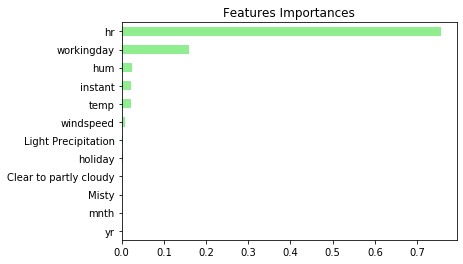

In [42]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

Apparently, `hr` and `workingday` are the most important features according to `rf`. The importances of these two features add up to more than 90%!

----

# Chapter 4: Boosting

### Define the AdaBoost classifier

In the following exercises you'll revisit the [Indian Liver Patient](https://www.kaggle.com/uciml/indian-liver-patient-records) dataset which was introduced in a previous chapter. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. However, this time, you'll be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

As a first step, you'll start by instantiating an AdaBoost classifier.
#### Instructions

- Import `AdaBoostClassifier` from `sklearn.ensemble`.
- Instantiate a `DecisionTreeClassifier` with `max_depth` set to 2.
- Instantiate an `AdaBoostClassifier` consisting of 180 trees and setting the `base_estimator` to `dt`.

In [43]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

Next comes training `ada` and evaluating the probability of obtaining the positive class in the test set.

----

### Train the AdaBoost classifier

Now that you've instantiated the AdaBoost classifier `ada`, it's time train it. You will also predict the probabilities of obtaining the positive class in the test set. This can be done as follows:

Once the classifier `ada` is trained, call the `.predict_proba()` method by passing `X_test` as a parameter and extract these probabilities by slicing all the values in the second column as follows:

```python
ada.predict_proba(X_test)[:,1]
```

The Indian Liver dataset is processed for you and split into 80% train and 20% test. Feature matrices `X_train` and `X_test`, as well as the arrays of labels `y_train` and `y_test` are available in your workspace. In addition, we have also loaded the instantiated model `ada` from the previous exercise.

#### Instructions

- Fit `ada` to the training set.
- Evaluate the probabilities of obtaining the positive class in the test set.

In [44]:
# prepare X and y for train dataset
X = liver.drop(['Liver_disease', 'Unnamed: 0'], axis=1)
y = liver['Liver_disease']

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=SEED)

In [45]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

Next, you'll evaluate `ada`'s ROC AUC score.

----

### Evaluate the AdaBoost classifier

Now that you're done training `ada` and predicting the probabilities of obtaining the positive class in the test set, it's time to evaluate `ada`'s ROC AUC score. Recall that the ROC AUC score of a binary classifier can be determined using the `roc_auc_score()` function from `sklearn.metrics`.

The arrays `y_test` and `y_pred_proba` that you computed in the previous exercise are available in your workspace.

#### Instructions

- Import `roc_auc_score` from `sklearn.metrics`.
- Compute `ada`'s test set ROC AUC score, assign it to `ada_roc_auc`, and print it out.

In [46]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.71


Not bad! This untuned AdaBoost classifier achieved a ROC AUC score of 0.71!

----

### Define the GB regressor

You'll now revisit the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset that was introduced in the previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a gradient boosting regressor.

As a first step, you'll start by instantiating a gradient boosting regressor which you will train in the next exercise.

#### Instructions

- Import `GradientBoostingRegressor` from `sklearn.ensemble`.
- Instantiate a gradient boosting regressor by setting the parameters:
    - `max_depth` to 4
    - `n_estimators` to 200

In [47]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
                               n_estimators=200,
                               random_state=2)

Time to train the regressor and predict test set labels.

----

### Train the GB regressor

You'll now train the gradient boosting regressor `gb` that you instantiated in the previous exercise and predict test set labels.

The dataset is split into 80% train and 20% test. Feature matrices `X_train` and `X_test`, as well as the arrays `y_train` and `y_test` are available in your workspace. In addition, we have also loaded the model instance `gb` that you defined in the previous exercise.

#### Instructions

- Fit `gb` to the training set.
- Predict the test set labels and assign the result to `y_pred`.

In [48]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

Time to evaluate the test set RMSE!

----

### Evaluate the GB regressor

Now that the test set predictions are available, you can use them to evaluate the test set Root Mean Squared Error (RMSE) of `gb`.

`y_test` and predictions `y_pred` are available in your workspace.

#### Instructions

- Import `mean_squared_error` from `sklearn.metrics` as `MSE`.
- Compute the test set MSE and assign it to `mse_test`.
- Compute the test set RMSE and assign it to `rmse_test`.

In [49]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = (mse_test)**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 0.458


----

### Regression with SGB

As in the exercises from the previous lesson, you'll be working with the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset. In the following set of exercises, you'll solve this bike count regression problem using stochastic gradient boosting.

#### Instructions

- Instantiate a Stochastic Gradient Boosting Regressor (SGBR) and set:
    - `max_depth` to 4 and `n_estimators` to 200,
    - `subsample` to 0.9, and
    - `max_features` to 0.75.

In [50]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)

----

### Train the SGB regressor

In this exercise, you'll train the `SGBR` sgbr instantiated in the previous exercise and predict the test set labels.

The bike sharing demand dataset is already loaded processed for you; it is split into 80% train and 20% test. The feature matrices `X_train` and `X_test`, the arrays of labels `y_train` and `y_test`, and the model instance `sgbr` that you defined in the previous exercise are available in your workspace.

#### Instructions

- Fit `sgbr` to the training set.
- Predict the test set labels and assign the results to `y_pred`.

In [51]:
# read the dataset
bikes = pd.read_csv('data/bikes.csv')
bikes.head(2)

# prepare X and y
X = bikes.drop('cnt', axis=1)
y = bikes['cnt']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=SEED)

In [52]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

----

### Evaluate the SGB regressor

You have prepared the ground to determine the test set RMSE of `sgbr` which you shall evaluate in this exercise.

`y_pred` and `y_test` are available in your workspace.

#### Instructions

- Import `mean_squared_error` as `MSE` from `sklearn.metrics`.
- Compute test set MSE and assign the result to `mse_test`.
- Compute test set RMSE and assign the result to `rmse_test`.

In [53]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 44.747


The stochastic gradient boosting regressor achieves a lower test set RMSE than the gradient boosting regressor (which was 52.065)!

----

# Chapter 5: Model Tuning

### Tree hyperparameters

In the following exercises you'll revisit the [Indian Liver Patient](https://www.kaggle.com/uciml/indian-liver-patient-records) dataset which was introduced in a previous chapter.

Your task is to tune the hyperparameters of a classification tree. Given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

We have instantiated a `DecisionTreeClassifier` and assigned to `dt` with `sklearn`'s default hyperparameters. You can inspect the hyperparameters of `dt` in your console.

Which of the following is not a hyperparameter of `dt`?

#### Possible Answers

- `min_impurity_decrease`
- `min_weight_fraction_leaf`
- **`min_features`**
- `splitter`

Output in the console

```python
In [1]: dt
Out[1]: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
```

----

### Set the tree's hyperparameter grid

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree `dt` and find the optimal classifier in the next exercise.

#### Instructions

- Define a grid of hyperparameters corresponding to a Python dictionary called `params_dt` with:
    - the key `'max_depth'` set to a list of values 2, 3, and 4
    - the key `'min_samples_leaf'` set to a list of values 0.12, 0.14, 0.16, 0.18

In [54]:
# Define params_dt
params_dt = {'max_depth': [2,3,4],
             'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]
}

Next comes performing the grid search.

----

### Search for the optimal tree

In this exercise, you'll perform grid search using 5-fold cross validation to find `dt`'s optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. Here you'll only be instantiating the `GridSearchCV` object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the `.fit()` method:

```python
grid_object.fit(X_train, y_train)
```

An untuned classification tree `dt` as well as the dictionary `params_dt` that you defined in the previous exercise are available in your workspace.

#### Instructions

- Import `GridSearchCV` from `sklearn.model_selection`.
- Instantiate a `GridSearchCV` object using 5-fold CV by setting the parameters:
    - `estimator` to `dt`, `param_grid` to `params_dt` and
    - `scoring` to `'roc_auc'`.

In [55]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

As we said earlier, we will fit the model to the trainig data for you and in the next exercise you will compute the test set ROC AUC score.

----

### Evaluate the optimal tree

In this exercise, you'll evaluate the test set ROC AUC score of `grid_dt`'s optimal model.

The dataset is already loaded and processed for you (numerical features are standardized); it is split into 80% train and 20% test. `X_test`, `y_test` are available in your workspace. In addition, we have also loaded the trained `GridSearchCV` object `grid_dt` that you instantiated in the previous exercise. Note that `grid_dt` was trained as follows:

```python
grid_dt.fit(X_train, y_train)
```

#### Instructions

- Import `roc_auc_score` from `sklearn.metrics`.
- Extract the `.best_estimator_` attribute from `grid_dt` and assign it to `best_model`.
- Predict the test set probabilities of obtaining the positive class `y_pred_proba`.
- Compute the test set ROC AUC score `test_roc_auc` of `best_model`.

In [56]:
# prepare X and y for train dataset
X = liver.drop(['Liver_disease', 'Unnamed: 0'], axis=1)
y = liver['Liver_disease']

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=SEED)

In [57]:
# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score

# Extract the best estimator

grid_dt.fit(X_train, y_train)
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.614


/Users/icer/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


An untuned classification-tree would achieve a ROC AUC score of `0.54`!

----

### Random forests hyperparameters

In the following exercises, you'll be revisiting the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset that was introduced in a previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be tuning the hyperparameters of a Random Forests regressor.

We have instantiated a `RandomForestRegressor` called `rf` using `sklearn`'s default hyperparameters. You can inspect the hyperparameters of `rf` in your console.

Which of the following is not a hyperparameter of `rf`?

#### Instructions

- `min_weight_fraction_leaf`
- `criterion`
- **`learning_rate`**
- `warm_start`

```python
In [1]: rf
Out[1]: 
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)
```

There is no hyperparameter named `learning_rate`.

----

### Set the hyperparameter grid of RF

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune `rf`'s hyperparameters and find the optimal regressor. For this purpose, you will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.

#### Instructions

- Define a grid of hyperparameters corresponding to a Python dictionary called `params_rf` with:
    - the key `'n_estimators'` set to a list of values 100, 350, 500
    - the key `'max_features'` set to a list of values 'log2', 'auto', 'sqrt'
    - the key `'min_samples_leaf'` set to a list of values 2, 10, 30

In [58]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators' : [100,350,500],
             'max_features' : ['log2', 'auto', 'sqrt'],
             'min_samples_leaf' : [2,10,30]
}

Time to perform the grid search.

----

### Search for the optimal forest

In this exercise, you'll perform grid search using 3-fold cross validation to find `rf`'s optimal hyperparameters. To evaluate each model in the grid, you'll be using the [negative mean squared error](http://scikit-learn.org/stable/modules/model_evaluation.html) metric.

Note that because grid search is an exhaustive search process, it may take a lot time to train the model. Here you'll only be instantiating the `GridSearchCV` object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the `.fit()` method:

```python
grid_object.fit(X_train, y_train)
```

The untuned random forests regressor model `rf` as well as the dictionary `params_rf` that you defined in the previous exercise are available in your workspace.

#### Instructions

- Import `GridSearchCV` from `sklearn.model_selection`.
- Instantiate a `GridSearchCV` object using 3-fold CV by using negative mean squared error as the scoring metric.

In [59]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

----

### Evaluate the optimal forest

In this last exercise of the course, you'll evaluate the test set RMSE of `grid_rf`'s optimal model.

The dataset is already loaded and processed for you and is split into 80% train and 20% test. In your environment are available `X_test`, `y_test` and the function `mean_squared_error` from `sklearn.metrics` under the alias `MSE`. In addition, we have also loaded the trained `GridSearchCV` object `grid_rf` that you instantiated in the previous exercise. Note that `grid_rf` was trained as follows:

```python
grid_rf.fit(X_train, y_train)
```

#### Instructions

- Import `mean_squared_error` as `MSE` from `sklearn.metrics`.
- Extract the best estimator from `grid_rf` and assign it to `best_model`.
- Predict `best_model`'s test set labels and assign the result to `y_pred`.
- Compute `best_model`'s test set RMSE.

In [60]:
# prepare X and y
X = bikes.drop('cnt', axis=1)
y = bikes['cnt']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=SEED)

In [61]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
grid_rf.fit(X_train, y_train)
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   43.6s finished


Test RMSE of best model: 51.755
